<a href="https://colab.research.google.com/github/BRIJNANDA1979/Segmenting-Kelp-Forests-/blob/main/Version_5_with_Uniform_QuantileTRANDFORM_LOGISTIC_MULTIVARIARE_REGRESSION_FOR_kELP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
###########       https://statinfer.com/204-2-3-multiple-logistic-regression/

In [2]:
import pandas as pd
import numpy as np
import os


In [3]:
pip install earthpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 43.2 MB/s eta 0:00:00


In [4]:
import earthpy.spatial as es
import rasterio
from rasterio.plot import show
import os
kelp_files = os.listdir('/content/drive/MyDrive/kelp_files_only')

train_satellite_data_with_kelp_data_list_swir =[]
train_satellite_data_with_kelp_data_list_nir =[]
train_satellite_data_with_kelp_data_list_red =[]
train_satellite_data_with_kelp_data_list_green =[]
train_satellite_data_with_kelp_data_list_blue =[]
train_satellite_data_with_kelp_data_list_index=[]
train_satellite_data_with_kelp_data_list_ndvi=[]
train_satellite_data_with_kelp_data_list_mndwi=[]
train_satellite_kelp_file_list =[] ##### selecting 100 train satellite kelp images for trainingn with label y=1
for file in kelp_files[0:100]:

    with rasterio.open(os.path.join('/content/drive/MyDrive/kelp_files_only',file)) as src:   ################   3527 train_satellite data files with kelp.....
      swir = src.read(1)
      nir = src.read(2)
      red = src.read(3)
      green = src.read(4)
      blue = src.read(5)
      train_INDEX = es.normalized_diff(swir,nir)
      train_NDVI = es.normalized_diff(green,nir)
      train_MNDWI = es.normalized_diff(green,swir)


      train_satellite_data_with_kelp_data_list_ndvi.append(train_NDVI)
      train_satellite_data_with_kelp_data_list_mndwi.append(train_MNDWI)
      train_satellite_data_with_kelp_data_list_swir.append(swir)
      train_satellite_data_with_kelp_data_list_nir.append(nir)
      train_satellite_data_with_kelp_data_list_red.append(red)
      train_satellite_data_with_kelp_data_list_green.append(green)
      train_satellite_data_with_kelp_data_list_blue.append(blue)
      train_satellite_data_with_kelp_data_list_index.append(train_INDEX)


      train_satellite_kelp_file_list.append(file)

/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [5]:

binary_kelp_data =[]
for file in kelp_files[0:100]:    ############# 100 images to filter kelp pixels from train_satellite data

    with rasterio.open(os.path.join('/content/drive/MyDrive/train_kelp',file)) as src:
      data = src.read(1)
      binary_kelp_data.append(data)

In [6]:

###### this code filters kelp pixels from kelp pixels of train_satellite kelp data....
Kelp_only_NDVI_pixels_list = []
Kelp_only_MNDWI_pixels_list = []
Kelp_only_swir_pixels_list = []
Kelp_only_nir_pixels_list = []
Kelp_only_red_pixels_list = []
Kelp_only_green_pixels_list = []
Kelp_only_blue_pixels_list = []
Kelp_only_INDEX_pixels_list =[]


for i in range(0,len(train_satellite_data_with_kelp_data_list_ndvi)):     #####
  A_ndvi = train_satellite_data_with_kelp_data_list_ndvi[i]
  A_mndwi = train_satellite_data_with_kelp_data_list_mndwi[i]
  A_swir = train_satellite_data_with_kelp_data_list_swir[i]
  A_nir = train_satellite_data_with_kelp_data_list_nir[i]
  A_red = train_satellite_data_with_kelp_data_list_red[i]
  A_green = train_satellite_data_with_kelp_data_list_green[i]
  A_blue = train_satellite_data_with_kelp_data_list_blue[i]
  A_index = train_satellite_data_with_kelp_data_list_index[i]
  B = binary_kelp_data[i]                                          #########  1000 files
  for j in range(350):                                                 ### shape of each image is 350x350
    for k in range(350):
      if  (B[j][k] != 0 ) :
        ###################################  SELECT only Positive values for pixels,,,,,
          if A_ndvi[j][k] > 0 :
            Kelp_only_NDVI_pixels_list.append(A_ndvi[j][k])
          if A_mndwi[j][k] > 0 :
            Kelp_only_MNDWI_pixels_list.append(A_mndwi[j][k])
          if A_swir[j][k] > 0 :
            Kelp_only_swir_pixels_list.append(A_swir[j][k])
          if A_nir[j][k] > 0 :
            Kelp_only_nir_pixels_list.append(A_nir[j][k])
          if A_red[j][k] > 0 :
            Kelp_only_red_pixels_list.append(A_red[j][k])
          if A_green[j][k] > 0 :
            Kelp_only_green_pixels_list.append(A_green[j][k])
          if A_blue[j][k] > 0 :
            Kelp_only_blue_pixels_list.append(A_blue[j][k])
          if A_index[j][k] > 0 :
            Kelp_only_INDEX_pixels_list.append(A_index[j][k])



In [7]:
############# now collect ndvi and mndwi pixels of not_kelp train_satellite data
Not_kelp_swir_pixels_list=[]
Not_kelp_nir_pixels_list=[]
Not_kelp_red_pixels_list=[]
Not_kelp_green_pixels_list=[]
Not_kelp_blue_pixels_list=[]
Not_kelp_NDVI_pixels_list = []
Not_kelp_MNDWI_pixels_list=[]
Not_kelp_INDEX_pixels_list =[]


not_kelp_files = os.listdir('/content/drive/MyDrive/not_kelp_files')
for file in not_kelp_files[0:50]:                                          #### 50 files not kelp data

    with rasterio.open(os.path.join('/content/drive/MyDrive/not_kelp_files',file)) as src:   ################   3527 train_satellite data files with kelp.....
      swir = src.read(1)
      nir = src.read(2)
      red = src.read(3)
      green = src.read(4)
      blue = src.read(5)
      not_kelp_train_INDEX = es.normalized_diff(swir,nir)
      not_kelp_train_NDVI = es.normalized_diff(green,nir)
      not_kelp_train_MNDWI = es.normalized_diff(green,swir)
      A = not_kelp_train_NDVI
      B = not_kelp_train_MNDWI
      C = not_kelp_train_INDEX
      #show(C)
      a = A.flatten()
      b = B.flatten()
      c = swir.flatten()
      d = nir.flatten()
      e = red.flatten()
      f = green.flatten()
      g = blue.flatten()
      h= C.flatten()
      for j in range(0,len(a)):       ##################### Selecting only POSITIVE VALUES OF PIXELS
        if(a[j]>0):
          Not_kelp_NDVI_pixels_list.append(a[j])
        if(b[j]>0):
          Not_kelp_MNDWI_pixels_list.append(b[j])
        if(c[j]>0):
          Not_kelp_swir_pixels_list.append(c[j])
        if(d[j]>0):
          Not_kelp_nir_pixels_list.append(d[j])
        if(e[j]>0):
          Not_kelp_red_pixels_list.append(e[j])
        if(f[j]>0):
          Not_kelp_green_pixels_list.append(f[j])
        if(g[j]>0):
          Not_kelp_blue_pixels_list.append(g[j])
        if(h[j]>0):
          Not_kelp_INDEX_pixels_list.append(h[j])



In [8]:
Not_kelp_NDVI_pixels_list[0:10]

[0.004963094935097989,
 0.027487562189054727,
 0.027487562189054727,
 0.004963094935097989,
 0.04808424257802588,
 0.004963094935097989,
 0.004963094935097989,
 0.027487562189054727,
 0.027487562189054727,
 0.004963094935097989]

In [9]:
Kelp_only_NDVI_pixels_list[0:10]

[0.01465292437600894,
 0.017221992069598152,
 0.017221992069598152,
 0.01465292437600894,
 0.017278106508875738,
 0.017278106508875738,
 0.017278106508875738,
 0.017278106508875738,
 0.017278106508875738,
 0.0016446495835322828]

In [10]:
len(Not_kelp_NDVI_pixels_list)

3218630

In [11]:
len(Kelp_only_INDEX_pixels_list)    #######  remove INDEX from analysis as not enough positive pixels

182

In [ ]:
###############  select 3000 pixels of Kelp kp and 20000 pixels of not_kelp nk

In [12]:
kp = 30000
nk = 20000

In [13]:
NDVI_pixels = Kelp_only_NDVI_pixels_list[0:kp] + Not_kelp_NDVI_pixels_list[0:nk]
MNDWI_pixels = Kelp_only_MNDWI_pixels_list[0:kp] + Not_kelp_MNDWI_pixels_list[0:nk]
swir_pixels = Kelp_only_swir_pixels_list[0:kp] + Not_kelp_swir_pixels_list[0:nk]
nir_pixels = Kelp_only_nir_pixels_list[0:kp] + Not_kelp_nir_pixels_list[0:nk]
red_pixels = Kelp_only_red_pixels_list[0:kp] + Not_kelp_red_pixels_list[0:nk]
green_pixels = Kelp_only_green_pixels_list[0:kp] + Not_kelp_green_pixels_list[0:nk]
blue_pixels = Kelp_only_blue_pixels_list[0:kp] + Not_kelp_blue_pixels_list[0:nk]


In [14]:
len(NDVI_pixels)

50000

In [15]:
y=[]

In [16]:
for i in range(0,len(NDVI_pixels)):
  if i < kp:
    y.append(1)
  else:
    y.append(0)

In [17]:
import pandas as pd

In [18]:
df = pd.DataFrame()
df['NDVI'] = NDVI_pixels
df['MNDWI'] = MNDWI_pixels
df['swir'] = swir_pixels
df['nir'] = nir_pixels
df['red'] = red_pixels
df['green'] = green_pixels
df['blue'] = blue_pixels



In [19]:
df['y'] =y

In [20]:
df.describe()

,NDVI,MNDWI,swir,nir,red,green,blue,y
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.016553,0.046405,7550.297820,8355.367880,8004.334300,8276.659260,8411.663780,0.600000
std,0.013841,0.020361,271.812138,653.100456,250.662295,316.736654,278.865658,0.489903
min,0.000053,0.000064,6814.000000,7185.000000,7147.000000,7156.000000,7184.000000,0.000000
25%,0.004774,0.029932,7391.000000,7818.000000,7873.000000,8117.000000,8250.000000,0.000000
50%,0.012860,0.045649,7546.000000,8328.000000,7997.000000,8259.000000,8433.000000,1.000000
75%,0.027252,0.056928,7653.000000,8786.000000,8081.000000,8443.000000,8615.000000,1.000000
max,0.134488,0.257368,13713.000000,22194.000000,13071.000000,14869.000000,14204.000000,1.000000


In [ ]:
#################  load test data to predict pixels as 0 or 1 for kelp classification

In [21]:
import earthpy.spatial as es
import rasterio
from rasterio.plot import show
import os
test_files = os.listdir('/content/drive/MyDrive/test_satellite')

test_satellite_data_with_data_list_swir =[]
test_satellite_data_with_data_list_nir =[]
test_satellite_data_with_data_list_red =[]
test_satellite_data_with_data_list_green =[]
test_satellite_data_with_data_list_blue =[]

test_satellite_data_with_data_list_ndvi=[]
test_satellite_data_with_data_list_mndwi=[]
test_satellite_data_with_data_list_index=[]
test_satellite_file_list =[] ##### selecting all
for file in test_files:

    with rasterio.open(os.path.join('/content/drive/MyDrive/test_satellite/',file)) as src:   ################   1026 test_satellite data files with kelp.....
      swir = src.read(1)
      nir = src.read(2)
      red = src.read(3)
      green = src.read(4)
      blue = src.read(5)
      #train_INDEX = es.normalized_diff(swir,nir)
      test_NDVI = es.normalized_diff(green,nir)
      test_MNDWI = es.normalized_diff(green,swir)
      ##test_INDEX = es.normalized_diff(swir,nir)


      test_satellite_data_with_data_list_swir.append(swir)
      test_satellite_data_with_data_list_nir.append(nir)
      test_satellite_data_with_data_list_red.append(red)
      test_satellite_data_with_data_list_green.append(green)
      test_satellite_data_with_data_list_blue.append(blue)
      test_satellite_data_with_data_list_ndvi.append(test_NDVI)
      test_satellite_data_with_data_list_mndwi.append(test_MNDWI)
     ## test_satellite_data_with_data_list_index.append(test_INDEX)
      test_satellite_file_list.append(file)

/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [22]:
df.head()

,NDVI,MNDWI,swir,nir,red,green,blue,y
0,0.014653,0.028834,7713,9040,7866,8171,8245,1
1,0.017222,0.035893,7212,9040,8191,7749,8034,1
2,0.017222,0.028834,7713,8672,7866,8171,8245,1
3,0.014653,0.070437,7463,9408,8516,8594,8663,1
4,0.017278,0.018801,7463,9408,8191,7749,7825,1


<Axes: >

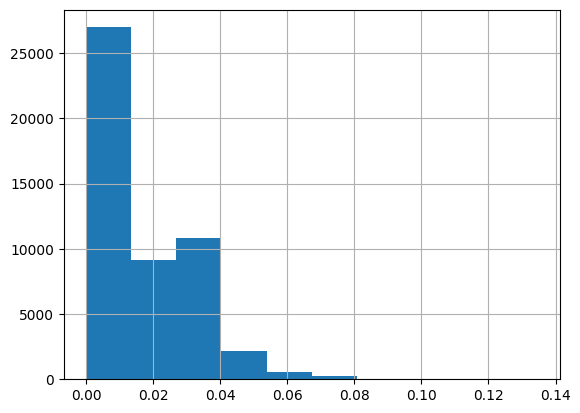

In [23]:
df['NDVI'].hist()

In [24]:
import seaborn as sns

<Axes: xlabel='NDVI', ylabel='Density'>

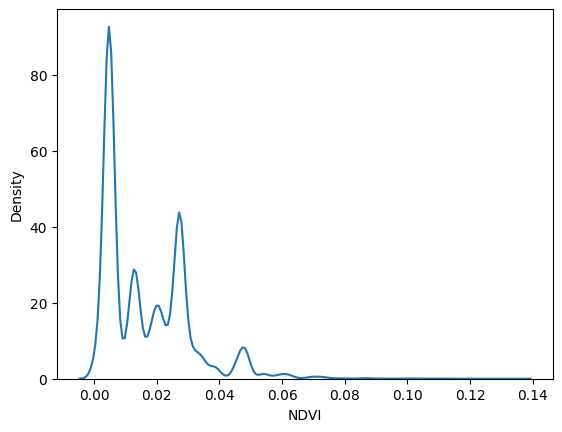

In [25]:
sns.kdeplot(df['NDVI'])

In [26]:
############                      Improve the model as z score is not good in model summary.....
#####################                 Try to normalize data using Quantile-transform

################# https://machinelearningmastery.com/quantile-transforms-for-machine-learning/

In [27]:
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer
from matplotlib import pyplot

In [ ]:
###############  Transform all data   indices...........

In [28]:
def transform_data(data):
    X_data = data.reshape(data.shape[0],1)
    quantile = QuantileTransformer(output_distribution='normal')
    data_trans = quantile.fit_transform(X_data)
    Y_data = data_trans.reshape(data_trans.shape[0])
    return Y_data



In [29]:
df['trans_NDVI'] = transform_data(np.array(df['NDVI']))
df['trans_MNDWI'] = transform_data(np.array(df['MNDWI']))
#df['trans_INDEX'] = transform_data(np.array(df['INDEX']))

<Axes: >

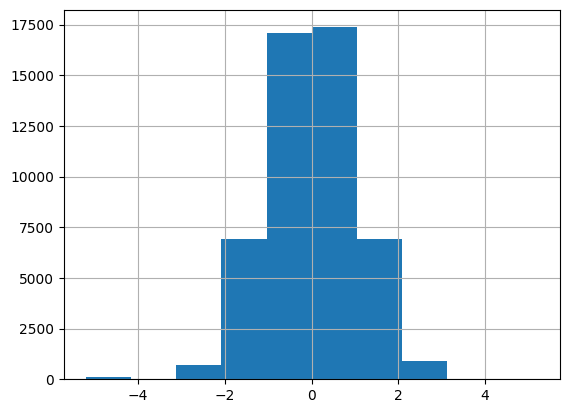

In [30]:
df['trans_NDVI'].hist()

<Axes: >

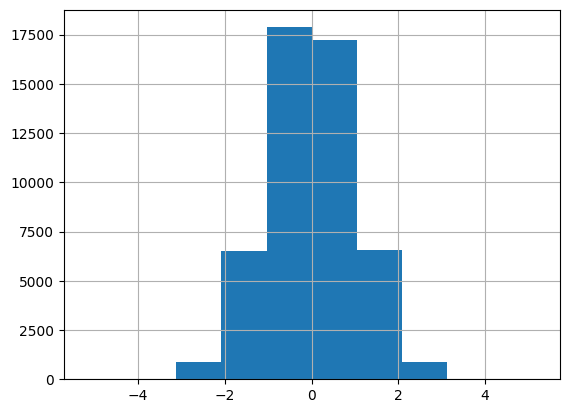

In [31]:
df['trans_MNDWI'].hist()

In [32]:
df.describe()

,NDVI,MNDWI,swir,nir,red,green,blue,y,trans_NDVI,trans_MNDWI
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.016553,0.046405,7550.297820,8355.367880,8004.334300,8276.659260,8411.663780,0.600000,0.010825,-0.002369
std,0.013841,0.020361,271.812138,653.100456,250.662295,316.736654,278.865658,0.489903,1.011846,0.996400
min,0.000053,0.000064,6814.000000,7185.000000,7147.000000,7156.000000,7184.000000,0.000000,-5.199338,-5.199338
25%,0.004774,0.029932,7391.000000,7818.000000,7873.000000,8117.000000,8250.000000,0.000000,-0.665852,-0.678433
50%,0.012860,0.045649,7546.000000,8328.000000,7997.000000,8259.000000,8433.000000,1.000000,0.009353,-0.012546
75%,0.027252,0.056928,7653.000000,8786.000000,8081.000000,8443.000000,8615.000000,1.000000,0.692715,0.673783
max,0.134488,0.257368,13713.000000,22194.000000,13071.000000,14869.000000,14204.000000,1.000000,5.199338,5.199338


In [33]:
df.head()

,NDVI,MNDWI,swir,nir,red,green,blue,y,trans_NDVI,trans_MNDWI
0,0.014653,0.028834,7713,9040,7866,8171,8245,1,0.174939,-1.007717
1,0.017222,0.035893,7212,9040,8191,7749,8034,1,0.203240,-0.531853
2,0.017222,0.028834,7713,8672,7866,8171,8245,1,0.203240,-1.007717
3,0.014653,0.070437,7463,9408,8516,8594,8663,1,0.174939,1.298174
4,0.017278,0.018801,7463,9408,8191,7749,7825,1,0.207223,-1.198363


In [34]:
from sklearn.linear_model import LogisticRegression
logistic= LogisticRegression()

In [35]:
logistic.fit(df[['NDVI']+['MNDWI']+['swir']+ ['nir'] + ['red'] + ['green'] + ['blue']], df['y'])

LogisticRegression()

In [36]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')

In [37]:
predict_df=logistic.predict(df[['NDVI']+['MNDWI']+['swir']+ ['nir'] + ['red'] + ['green'] + ['blue']])
df['predicted'] = predict_df

In [38]:
df.head()

,NDVI,MNDWI,swir,nir,red,green,blue,y,trans_NDVI,trans_MNDWI,predicted
0,0.014653,0.028834,7713,9040,7866,8171,8245,1,0.174939,-1.007717,1
1,0.017222,0.035893,7212,9040,8191,7749,8034,1,0.203240,-0.531853,1
2,0.017222,0.028834,7713,8672,7866,8171,8245,1,0.203240,-1.007717,1
3,0.014653,0.070437,7463,9408,8516,8594,8663,1,0.174939,1.298174,1
4,0.017278,0.018801,7463,9408,8191,7749,7825,1,0.207223,-1.198363,1


In [39]:
df['predicted'].value_counts()

1    29722
0    20278
Name: predicted, dtype: int64

In [40]:
df['y'].value_counts()

1    30000
0    20000
Name: y, dtype: int64

In [41]:
###############   this is result after normalizing indices....

In [42]:
#What are the most impacting variables?
#### From summary of the model


import statsmodels.api as sm
logit1=sm.Logit(df['y'],df[['NDVI']+['MNDWI']+['swir']+ ['nir'] + ['red'] + ['green'] + ['blue']])

logit1

In [43]:
result=logit1.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.106026
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                50000
Model:                          Logit   Df Residuals:                    49993
Method:                           MLE   Df Model:                            6
Date:                Thu, 18 Jan 2024   Pseudo R-squ.:                  0.8425
Time:                        02:58:57   Log-Likelihood:                -5301.3
converged:                       True   LL-Null:                       -33651.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
NDVI          -4.3316      1.785     -2.427      0.015      -7.829      -0.834
MNDWI         41.0193      1.434     28.608      0.000      38.209      43.830
swir          -0.0038      0.000    -32.627      0.000      -0.004      -0.004
nir            0.0099      0.000     59.852      0.000       0.010       0.010
red           -0.0011      0.000     -7.293      0.000      -0.001      -0.001
green          0.0056      0.000     42.201      0.000       0.005       0.006
blue          -0.0106      0.000    -69.103      0.000      -0.011      -0.010
==============================================================================

Possibly complete quasi-separation: A fraction 0.30 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [ ]:
############ use PCA for finding principal 4 components that cleary classify into 0 and 1 labelled pixels

In [44]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt


In [45]:
X = df[['NDVI']+['MNDWI']+['swir']+ ['nir'] + ['red'] + ['green'] + ['blue']]
y = df['y']

In [81]:
# Create a PCA instance
pca = PCA(n_components=4)

# Fit the PCA model to the data
X_pca = pca.fit_transform(X)

In [82]:
X_pca[:,0]

array([ 603.59017539,  487.59510922,  269.88172151, ..., -654.8255299 ,
       -571.5139926 , -711.31320615])

In [88]:
X_pca[:]

array([[ 603.59017539, -353.37354043,  190.16078091,  -79.25212314],
       [ 487.59510922, -744.37131104,  -94.28319105, -300.03208257],
       [ 269.88172151, -260.89174991,  172.612684  ,   39.00407745],
       ...,
       [-654.8255299 ,  -10.68757696,  361.60939106,  -99.94856881],
       [-571.5139926 ,  319.39371019,  222.13769   ,  -93.3161418 ],
       [-711.31320615,   61.32048317,  243.85008893, -336.38418584]])

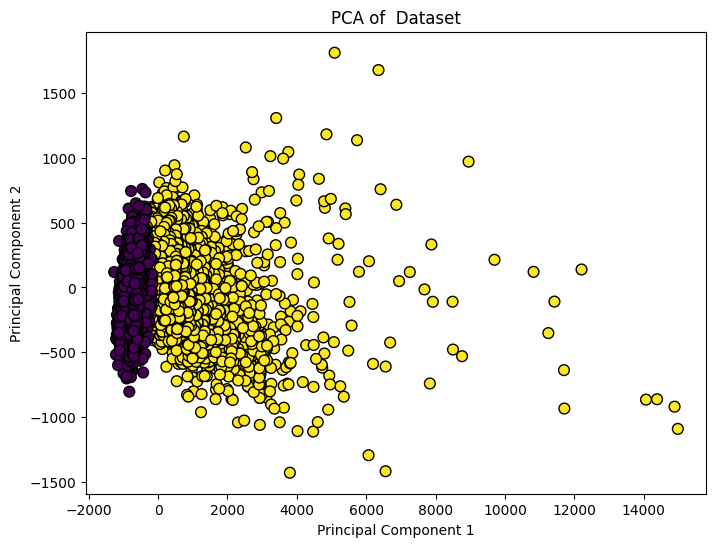

In [87]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 3], c=y, cmap='viridis', edgecolor='k', s=60)
plt.title('PCA of  Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [89]:
df_pca = pd.DataFrame()

In [95]:
df_pca['first']= X_pca[:,0]
df_pca['second'] = X_pca[:,1]
df_pca['third']  = X_pca[:,2]
df_pca['fourth'] = X_pca[:,3]
df_pca['y'] = df['y']

In [96]:
df_pca

,first,second,third,fourth,y
0,603.590175,-353.373540,190.160781,-79.252123,1
1,487.595109,-744.371311,-94.283191,-300.032083,1
2,269.881722,-260.891750,172.612684,39.004077,1
3,1129.185405,233.717114,-194.094952,-361.949636,1
4,887.251749,-920.937012,60.734077,-142.244480,1
...,...,...,...,...,...
49995,-670.518633,-300.264618,89.689511,30.613690,0
49996,-684.116824,-179.736251,141.076370,-91.718936,0
49997,-654.825530,-10.687577,361.609391,-99.948569,0
49998,-571.513993,319.393710,222.137690,-93.316142,0


In [97]:
df_pca.describe()

,first,second,third,fourth,y
count,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.000000
mean,7.916242e-14,-8.673305e-13,2.281740e-13,3.786408e-13,0.600000
std,7.103436e+02,3.427998e+02,2.451808e+02,1.932156e+02,0.489903
min,-1.261852e+03,-1.277980e+03,-1.464906e+03,-1.431924e+03,0.000000
25%,-6.009564e+02,-1.987193e+02,-1.596877e+02,-1.199110e+02,0.000000
50%,2.448788e+01,-2.459213e+01,-2.558316e+01,6.445081e+00,1.000000
75%,4.432235e+02,1.644195e+02,1.474229e+02,1.264149e+02,1.000000
max,1.497912e+04,8.704032e+03,4.233108e+03,1.813094e+03,1.000000


array([[<Axes: title={'center': 'first'}>,
        <Axes: title={'center': 'second'}>],
       [<Axes: title={'center': 'third'}>,
        <Axes: title={'center': 'fourth'}>],
       [<Axes: title={'center': 'y'}>, <Axes: >]], dtype=object)

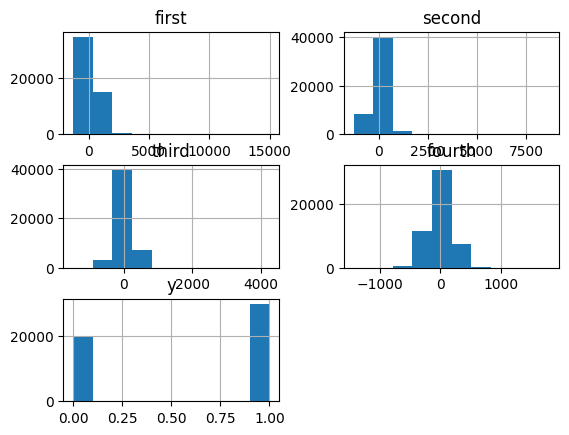

In [98]:
df_pca.hist()

In [99]:
logistic= LogisticRegression()
logistic.fit(df_pca[['first']+['second']+['third']+ ['fourth']], df['y'])   #### fit on TRAINING DATA IN DF
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')

In [101]:
predicted_df_pca=logistic.predict(df_pca[['first']+['second']+['third']+ ['fourth']])  ### Predict on train_data transformed by PCA
df_pca['predicted'] = predicted_df_pca

In [102]:
df_pca

,first,second,third,fourth,y,predicted
0,603.590175,-353.373540,190.160781,-79.252123,1,1
1,487.595109,-744.371311,-94.283191,-300.032083,1,1
2,269.881722,-260.891750,172.612684,39.004077,1,1
3,1129.185405,233.717114,-194.094952,-361.949636,1,1
4,887.251749,-920.937012,60.734077,-142.244480,1,1
...,...,...,...,...,...,...
49995,-670.518633,-300.264618,89.689511,30.613690,0,0
49996,-684.116824,-179.736251,141.076370,-91.718936,0,0
49997,-654.825530,-10.687577,361.609391,-99.948569,0,0
49998,-571.513993,319.393710,222.137690,-93.316142,0,0


In [105]:
df_pca['predicted'].value_counts()

1    29722
0    20278
Name: predicted, dtype: int64

In [107]:
import statsmodels.api as sm
logit1=sm.Logit(df['y'],df_pca[['first']+['second']+['third']+ ['fourth']])


In [108]:
result_pca=logit1.fit()
result_pca.summary()

Optimization terminated successfully.
         Current function value: 0.130310
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                50000
Model:                          Logit   Df Residuals:                    49996
Method:                           MLE   Df Model:                            3
Date:                Thu, 18 Jan 2024   Pseudo R-squ.:                  0.8064
Time:                        02:05:26   Log-Likelihood:                -6515.5
converged:                       True   LL-Null:                       -33651.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
first          0.0087   9.75e-05     89.673      0.000       0.009       0.009
second         0.0009   7.62e-05     11.394      0.000       0.001       0.001
third         -0.0076      0.000    -56.510      0.000      -0.008      -0.007
fourth         0.0087      0.000     55.071      0.000       0.008       0.009
==============================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [ ]:
PCA failed badly................!!!!!!!!!!!!!!!!!!!!!!

In [ ]:
########################  Let us try RANDOM fOREST FOR solution to quasi separation problem...

In [46]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import make_classification
X = df[['NDVI']+['MNDWI']+['swir']+ ['nir'] + ['red'] + ['green'] + ['blue']]
y = df['y']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=1000, random_state=42)   ### 1000 trees...

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)


Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3948
           1       1.00      1.00      1.00      6052

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [ ]:
##########   still   Z is not according to desired one....

In [ ]:

logistic= LogisticRegression()
logistic.fit(df[['NDVI']+['MNDWI']+['swir']+ ['nir'] + ['red'] + ['green'] + ['blue']], df['y'])   #### fit on TRAINING DATA IN DF
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
id = 0
for file in test_satellite_file_list:
    test_df = pd.DataFrame()
    test_df['swir'] = np.array(test_satellite_data_with_data_list_swir[id].flatten())
    test_df['nir'] = np.array(test_satellite_data_with_data_list_nir[id].flatten())
    test_df['NDVI'] = np.array(test_satellite_data_with_data_list_ndvi[id].flatten())
    test_df['MNDWI'] = np.array(test_satellite_data_with_data_list_mndwi[id].flatten())
    test_df['red'] = np.array(test_satellite_data_with_data_list_red[id].flatten())
    test_df['green'] = np.array(test_satellite_data_with_data_list_green[id].flatten())
    test_df['blue'] = np.array(test_satellite_data_with_data_list_blue[id].flatten())
    #test_df['INDEX'] = np.array(test_satellite_data_with_data_list_index[id].flatten())

    id+=1                      ######## increment id by 1 for next image data

    trans_NDVI = transform_data(np.array(test_df['NDVI']))
    trans_MNDWI = transform_data(np.array(test_df['MNDWI']))
    #trans_INDEX = transform_data(np.array(test_df['INDEX']))


    test_df['trans_NDVI'] = trans_NDVI
    test_df['trans_MNDWI'] = trans_MNDWI

    Test_X = test_df[['NDVI']+['MNDWI']+['swir']+ ['nir'] + ['red'] + ['green'] + ['blue']]
    Y_prediction = rf_classifier.predict(Test_X)

    test_df['Prediction_RF_model'] = Y_prediction

    #test_df['trans_INDEX'] = trans_INDEX

    #predict_df=logistic.predict(test_df[['trans_NDVI']+['trans_MNDWI']])  ### Predict on Test data in test_df

    #test_df['predicted'] = predict_df

    image = np.array(Y_prediction)

    image = image.reshape(350,350)
    with rasterio.open('/content/drive/MyDrive/test_satellite/'+file) as src:
      profile = src.profile
      profile.update(dtype=rasterio.uint8,count=1)
      s = file.split('_')
      ss = s[0] + '_kelp.tif'
      with rasterio.open('/content/drive/MyDrive/Random_forest/'+ss,'w',**profile) as dst:
        dst.write(image,1)

/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save

In [ ]:
test_df   ### this is output of one test satellite file 350x350

In [119]:
test_df['predicted'].value_counts()

1    62631
0    59869
Name: predicted, dtype: int64

<Axes: >

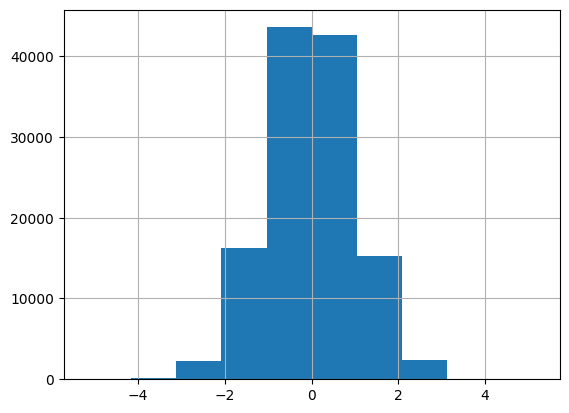

In [121]:
test_df['trans_INDEX'].hist()

<Axes: xlabel='trans_INDEX', ylabel='Density'>

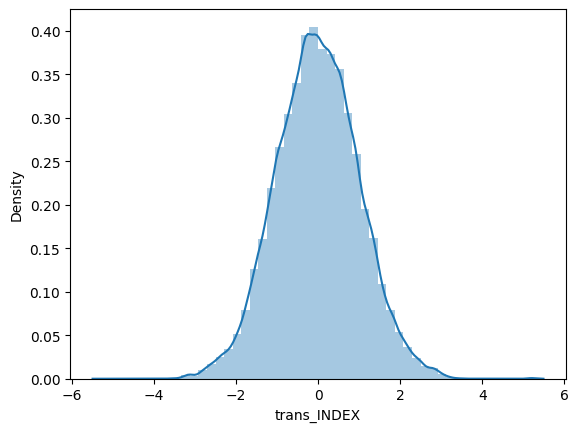

In [122]:
sns.distplot(test_df['trans_INDEX'])

<Axes: >

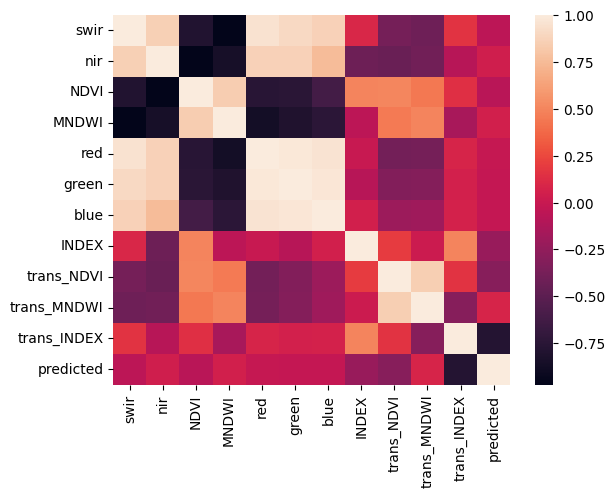

In [123]:
sns.heatmap(test_df.corr())

In [ ]:
###################  version 4 with submission result 0.02...not good
############  now use uniform rather than normal distribution........with 4 Quantiles

In [131]:
def uniformly_transform_data(data):
    X_data = data.reshape(data.shape[0],1)
    quantile = QuantileTransformer(n_quantiles=4, output_distribution='uniform')
    data_trans = quantile.fit_transform(X_data)
    Y_data = data_trans.reshape(data_trans.shape[0])
    return Y_data

In [134]:
DF = pd.DataFrame()
DF =df.copy()

In [135]:
DF


,NDVI,MNDWI,swir,nir,red,green,blue,INDEX,y,Trans_NDVI,trans_NDVI,trans_MNDWI,trans_INDEX,predicted
0,-0.050491,0.028834,7713,9040,7866,8171,8245,-0.079210,1,-1.052237,-1.042874,-0.629481,-0.921411,1
1,-0.076896,0.035893,7212,9040,8191,7749,8034,-0.112478,1,-1.403052,-1.382343,-0.122939,-1.506991,1
2,-0.029745,0.028834,7713,8672,7866,8171,8245,-0.058529,1,-0.692232,-0.699786,-0.629481,-0.483996,1
3,-0.045217,0.070437,7463,9408,8516,8594,8663,-0.115287,1,-0.970104,-0.973796,1.771182,-1.546756,1
4,-0.096695,0.018801,7463,9408,8191,7749,7825,-0.115287,1,-1.572789,-1.564284,-0.981432,-1.546756,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254195,-0.218015,-0.117889,13048,16037,10439,10296,9917,-0.102768,0,-2.312336,-2.386162,-2.224680,-1.388742,1
254196,-0.211154,-0.109262,13264,16353,10439,10651,9917,-0.104298,0,-2.269548,-2.348977,-2.195514,-1.403754,1
254197,-0.229110,-0.117235,13480,16982,10439,10651,9917,-0.114963,0,-2.408550,-2.463494,-2.222405,-1.541331,1
254198,-0.211154,-0.117235,13480,16353,10439,10651,9917,-0.096303,0,-2.269548,-2.348977,-2.222405,-1.247770,1


In [136]:
DF['trans_NDVI'] = uniformly_transform_data(np.array(DF['NDVI']))
DF['trans_MNDWI'] = uniformly_transform_data(np.array(DF['MNDWI']))
DF['trans_INDEX'] = uniformly_transform_data(np.array(DF['INDEX']))

<Axes: >

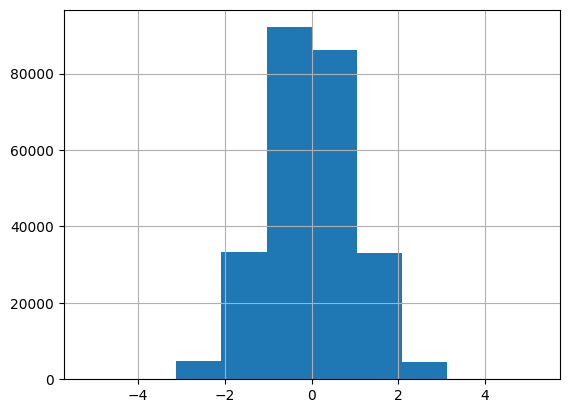

In [137]:
DF['Trans_NDVI'].hist()

<Axes: >

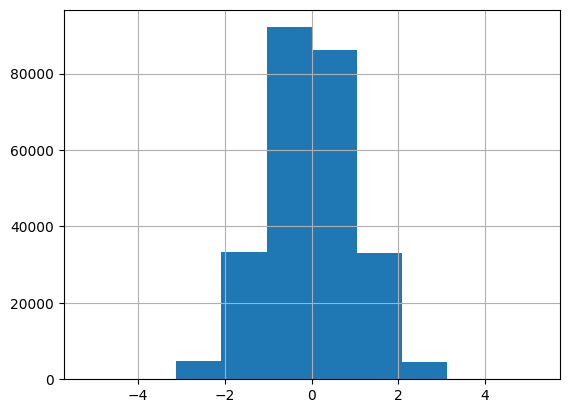

In [138]:
df['Trans_NDVI'].hist()

In [ ]:
##############  no difference in distribution...